<a href="https://colab.research.google.com/github/Prans93/testrepo/blob/main/ImgClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch
import torchvision
import tarfile
import os
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline

In [5]:
project_name='pranav-cifar10-cnn'

In [6]:
# Dowload the dataset
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, '.')

  0%|          | 0/135107811 [00:00<?, ?it/s]

In [7]:
# Extract from archive
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
    tar.extractall(path='./data')

In [8]:
data_dir = './data/cifar10'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['test', 'train']
['truck', 'airplane', 'bird', 'deer', 'dog', 'frog', 'horse', 'cat', 'ship', 'automobile']


In [9]:
airplane_files = os.listdir(data_dir + "/train/airplane")
print('No. of training examples for airplanes:', len(airplane_files))
print(airplane_files[:10])

No. of training examples for airplanes: 5000
['4565.png', '0572.png', '3484.png', '3162.png', '4582.png', '2696.png', '3430.png', '1951.png', '2298.png', '1653.png']


In [11]:
truck_test_files = os.listdir(data_dir + "/test/ship")
print("No. of test examples for truck:", len(truck_test_files))
print(truck_test_files[:5])

No. of test examples for truck: 1000
['0572.png', '0821.png', '0816.png', '0305.png', '0683.png']


In [12]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [13]:
# Loading images as PyTorch tensors 
dataset = ImageFolder(data_dir+'/train', transform=ToTensor())

In [14]:
# image tensor shape
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 32, 32]) 0


tensor([[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
         [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
         [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
         ...,
         [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
         [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
         [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],

        [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
         [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
         [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
         ...,
         [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
         [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
         [0.8471, 0.8431, 0.8471,  ..., 0.9333, 0.9333, 0.9333]],

        [[0.7804, 0.7804, 0.7882,  ..., 0.7843, 0.7804, 0.7765],
         [0.7961, 0.7961, 0.8000,  ..., 0.8039, 0.7961, 0.7882],
         [0.8118, 0.8157, 0.8235,  ..., 0.8235, 0.8157, 0.

In [15]:
#Image tensor assigns numeric labels to images
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [16]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [17]:
# permute reverses the channel (0th is the last channel), as we want the dimension
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  airplane (0)


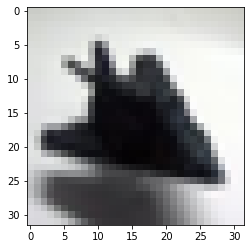

In [18]:
img, label = dataset [0]
show_example(img, label)

Label:  airplane (0)


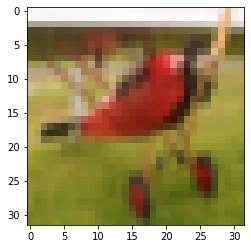

In [19]:
#Better version *args python
show_example(*dataset[2])

Label:  airplane (0)


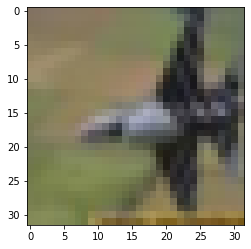

In [20]:
show_example(*dataset[670])

In [21]:
#set a seed for the random number generator for (Train, dev and test set) , random G for dev test
random_seed = 42
torch.manual_seed(random_seed);

In [22]:
dev_size = 5000
train_size = len(dataset) - dev_size

train_ds, dev_ds = random_split(dataset, [train_size, dev_size])
len(train_ds), len(dev_ds)

(45000, 5000)

In [23]:
#Creating data loaders for training and validation, to load the data in batches 
from torch.utils.data.dataloader import DataLoader
batch_size=128

In [24]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
dev_dl = DataLoader(dev_ds, batch_size*2, num_workers=4, pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [25]:
# Try to look at more often, batch images (batch from the dl), permute(moves channel to the last dim)
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

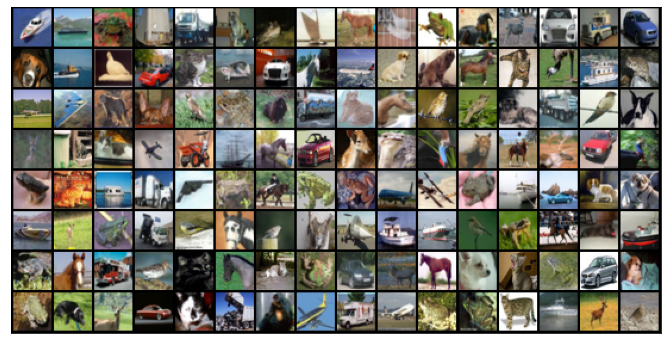

In [26]:
show_batch(train_dl)

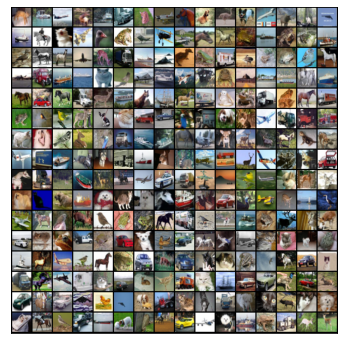

In [27]:
show_batch(dev_dl)

In [28]:
# Convolutional NN, Feature maps from it using feature kernel
def apply_kernel(image, kernel):
    ri, ci = image.shape       # image dimensions
    rk, ck = kernel.shape      # kernel dimensions
    ro, co = ri-rk+1, ci-ck+1  # output dimensions
    output = torch.zeros([ro, co])
    for i in range(ro): 
        for j in range(co):
            output[i,j] = torch.sum(image[i:i+rk,j:j+ck] * kernel)
    return output

In [29]:
sample_image = torch.tensor([
    [3, 3, 2, 1, 0], 
    [0, 0, 1, 3, 1], 
    [3, 1, 2, 2, 3], 
    [2, 0, 0, 2, 2], 
    [2, 0, 0, 0, 1]
], dtype=torch.float32)

sample_kernel = torch.tensor([
    [0, 1, 2], 
    [2, 2, 0], 
    [0, 1, 2]
], dtype=torch.float32)

apply_kernel(sample_image, sample_kernel)



tensor([[12., 12., 17.],
        [10., 17., 19.],
        [ 9.,  6., 14.]])

In [30]:
import torch.nn as nn
import torch.nn.functional as F

In [31]:
# Sequential model forms a forward prop (it takes the input to make the feature map and the MAX Pool)
conv = nn.Sequential(
    nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(2, 2)
)

In [32]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = conv(images)
    print('out.shape:', out.shape)
    break

images.shape: torch.Size([128, 3, 32, 32])
out.shape: torch.Size([128, 8, 16, 16])


In [33]:
class ImgClassification(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def dev_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'dev_loss': loss.detach(), 'dev_acc': acc} #stored in dictionary the cross-entropy
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['dev_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['dev_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'dev_loss': epoch_loss.item(), 'dev_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, dev_loss: {:.4f}, dev_acc: {:.4f}".format(
            epoch, result['train_loss'], result['dev_loss'], result['dev_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))   #index which has the highest value

In [34]:
class ModelDep(ImgClassification):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

            nn.Flatten(), 
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10))
        
    def forward(self, xb):
        return self.network(xb)

In [35]:
model = ModelDep()
model

ModelDep(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_features=10

In [36]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([128, 3, 32, 32])
out.shape: torch.Size([128, 10])
out[0]: tensor([ 0.0269,  0.0142, -0.0089, -0.0402, -0.0177, -0.0444,  0.0414, -0.0070,
         0.0265,  0.0070], grad_fn=<SelectBackward0>)


In [37]:
dataset.classes #It is a ship in this case

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [38]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [39]:
device = get_default_device()
device

device(type='cpu')

In [41]:
dev_dl = DeviceDataLoader(dev_dl, device)
to_device(model, device);

In [49]:
@torch.no_grad()          # no grad desc in the validation step
def evaluate(model, dev_loader):
    model.eval()
    outputs = [model.dev_step(batch) for batch in dev_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, dev_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, dev_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item() #avg training loss in the validation step
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [50]:
model = to_device(ModelDep(), device)

In [51]:
evaluate(model, dev_dl) #Stochastic gradient descent from random CNN without any set feature

{'dev_loss': 2.302673816680908, 'dev_acc': 0.09630055725574493}

In [52]:
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.001

In [55]:
history = fit(num_epochs, lr, model, train_dl, dev_dl, opt_func) # Adam optimizer with momemtum, batch, RMSprop

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], train_loss: 1.7816, dev_loss: 1.4278, dev_acc: 0.4791
Epoch [1], train_loss: 1.2191, dev_loss: 1.0663, dev_acc: 0.6187
Epoch [2], train_loss: 0.9482, dev_loss: 0.9201, dev_acc: 0.6776
Epoch [3], train_loss: 0.7551, dev_loss: 0.7851, dev_acc: 0.7359
Epoch [4], train_loss: 0.6156, dev_loss: 0.7453, dev_acc: 0.7456
Epoch [5], train_loss: 0.4864, dev_loss: 0.7499, dev_acc: 0.7462
Epoch [6], train_loss: 0.3780, dev_loss: 0.7783, dev_acc: 0.7604
Epoch [7], train_loss: 0.2829, dev_loss: 0.8131, dev_acc: 0.7621
Epoch [8], train_loss: 0.2039, dev_loss: 0.9088, dev_acc: 0.7609
Epoch [9], train_loss: 0.1579, dev_loss: 1.0039, dev_acc: 0.7613


In [56]:
def plot_accuracies(history):
    accuracies = [x['dev_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

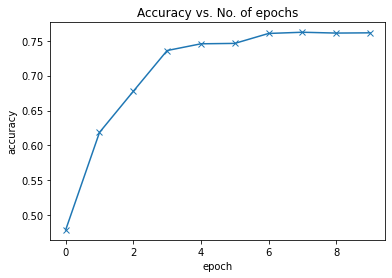

In [58]:
plot_accuracies(history)

In [61]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['dev_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

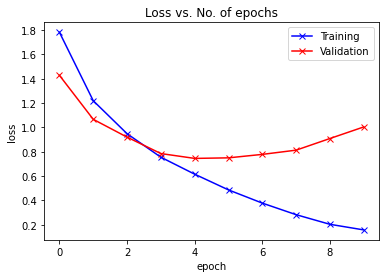

In [62]:
plot_losses(history)

In [63]:
test_dataset = ImageFolder(data_dir+'/test', transform=ToTensor())

In [65]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: airplane , Predicted: airplane


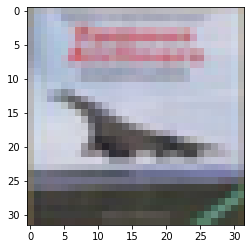

In [66]:
img, label = test_dataset[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: deer , Predicted: deer


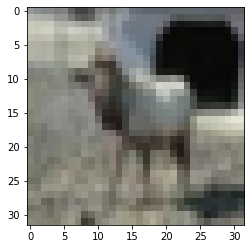

In [67]:
img, label = test_dataset[4567]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))